In [104]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [105]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

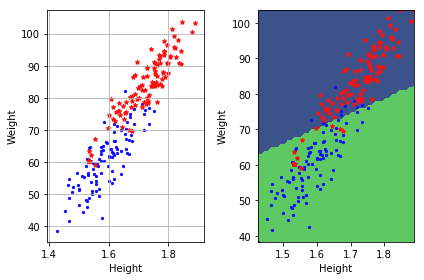

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx
    w=least_squares(y,tx)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [7]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1+np.exp(t))

In [38]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    N=y.shape[0]
        
    loss=0
    for i in range(N):
        xt=np.transpose(tx[i])
        loss=loss+np.log(1+np.exp(np.dot(xt,w)))-y[i]*np.dot(xt,w).shape    
    return loss[0]

In [62]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return np.dot(np.transpose(tx),sigmoid(np.dot(tx,w))-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [11]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    loss=calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad=calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-gamma*grad
    return loss, w

Demo!

Current iteration=0, loss=36.629436111988966
Current iteration=100, loss=259.6379703690217
Current iteration=200, loss=298.6483927446948
Current iteration=300, loss=319.98521612483347
Current iteration=400, loss=332.20789440070314
Current iteration=500, loss=339.4404052999773
Current iteration=600, loss=343.8030620483568
Current iteration=700, loss=346.4648298904942
Current iteration=800, loss=348.1000525732068
Current iteration=900, loss=349.1088489116521
Current iteration=1000, loss=349.732794308573
Current iteration=1100, loss=350.1193194880191
Current iteration=1200, loss=350.3590008837374
Current iteration=1300, loss=350.5077156986145
Current iteration=1400, loss=350.6000232898591
Current iteration=1500, loss=350.6573321658839
Current iteration=1600, loss=350.69291735083493
Current iteration=1700, loss=350.71501548419155
Current iteration=1800, loss=350.7287390252091
Current iteration=1900, loss=350.7372620122217
Current iteration=2000, loss=350.74255531593724
Current iteration=21

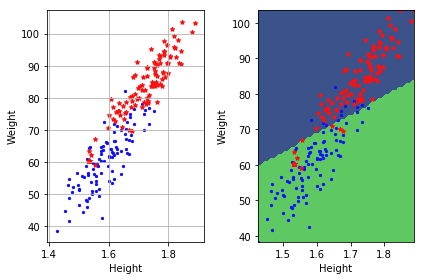

In [46]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [101]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    n=y.shape[0]
    S=np.zeros(shape=(n,n))
    
    for i in range(n):
        S[i][i]=(sigmoid(np.dot(tx[i],w))*(1-sigmoid(np.dot(tx[i],w))))[0]

    txt=np.transpose(tx)
    a=np.dot(txt,S)
    return np.dot(a,tx)
#calculate_hessian(y,tx,w)

Write a function below to return loss, gradient, and hessian.

In [63]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss=calculate_loss(y, tx, w)
    grad=calculate_gradient(y, tx, w)    
    H=calculate_hessian(y, tx, w)
    return loss,grad,H

### Using Newton's method
Use Newton's method for logistic regression.

In [64]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    gamma=0.1
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss,grad,h=logistic_regression(y, tx, w)b
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-gamma*np.linalg.inv(h)*grad
    return loss, w

demo

Current iteration=0, the loss=36.629436111988966
Current iteration=1, the loss=-166.9701638882772
Current iteration=2, the loss=-166.60911839247632
Current iteration=3, the loss=-166.28361983934997
Current iteration=4, the loss=-165.9902177537386
Current iteration=5, the loss=-165.72578736800176
Current iteration=6, the loss=-165.48750060285545
Current iteration=7, the loss=-165.27279930794975
Current iteration=8, the loss=-165.07937064962718
Current iteration=9, the loss=-164.90512452525545
Current iteration=10, the loss=-164.74817287936855
Current iteration=11, the loss=-164.60681079578285
Current iteration=12, the loss=-164.47949924109705
Current iteration=13, the loss=-164.3648493380675
Current iteration=14, the loss=-164.26160805169178
Current iteration=15, the loss=-164.16864517611856
Current iteration=16, the loss=-164.08494151636762
Current iteration=17, the loss=-164.00957816507469
Current iteration=18, the loss=-163.94172678085374
Current iteration=19, the loss=-163.880640781

ValueError: cannot reshape array of size 9648 into shape (67,48)

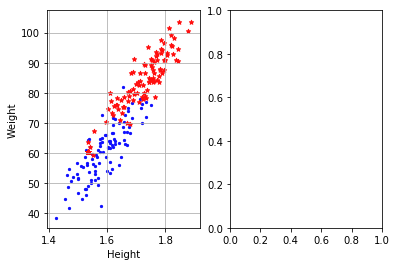

In [106]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [113]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss,grad,h=logistic_regression(y, tx, w)
    reg=lambda_/2*np.linalg.norm(w,2)
    return loss+reg,grad,h

In [111]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    loss,grad,h=penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-gamma*np.linalg.inv(h)*grad
    return loss, w

In [112]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            #print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
            print("")
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

0.0

0.00945732628754
0.0188651305379
0.0282301449618
0.037559083403
0.0468585908976
0.0561351978968
0.0653952795942
0.0746450205445
0.0838903845426
0.0931370895722
0.102390587513
0.111656048241
0.120938347707
0.130242059611
0.139571450286
0.14893047644
0.158322785464
0.167751718032
0.177220312743
0.186731312601
0.196287173136
0.205890071968
0.215541919629
0.225244371474
0.234998840471
0.24480651071
0.254668351417
0.264585131323
0.274557433172
0.284585668243
0.294670090695
0.304810811616
0.315007812644
0.325260959058
0.335570012257
0.345934641544
0.356354435192
0.366828910732
0.377357524468
0.38793968021
0.398574737234
0.409262017487
0.420000812073
0.430790387055
0.441629988606
0.452518847555
0.463456183381
0.474441207693
0.485473127247
0.496551146535
0.507674470014
0.518842303982
0.53005385817
0.54130834707
0.552604991034
0.563943017186
0.575321660154
0.586740162667
0.598197776028
0.609693760481
0.621227385503
0.632797930014
0.64440468254
0.656046941323
0.667724014398
0.679435219637
0

7.66913454878
7.68273473943
7.69633513076
7.70993572166
7.72353651105
7.73713749785
7.75073868101
7.76434005944
7.77794163209
7.79154339793

7.80514535589
7.81874750496
7.83234984411
7.84595237231
7.85955508855
7.87315799182
7.88676108113
7.90036435548
7.91396781389
7.92757145538
7.94117527897
7.9547792837
7.96838346862
7.98198783276
7.99559237518
8.00919709494
8.02280199111
8.03640706276
8.05001230897
8.06361772883
8.07722332142
8.09082908584
8.10443502121
8.11804112662
8.13164740119
8.14525384405
8.15886045432
8.17246723113
8.18607417363
8.19968128096
8.21328855228
8.22689598673
8.24050358347
8.25411134169
8.26771926055
8.28132733923
8.29493557691
8.30854397278
8.32215252605
8.33576123591
8.34937010156
8.36297912222
8.3765882971
8.39019762543
8.40380710643
8.41741673934
8.43102652339
8.44463645782
8.45824654189
8.47185677484
8.48546715593
8.49907768443
8.5126883596
8.52629918071
8.53991014704
8.55352125787
8.56713251248
8.58074391018
8.59435545025
8.607967132
8.62157895472
8.63519091

15.9558679695
15.9695124454

15.9831569494
15.9968014815
16.0104460416
16.0240906296
16.0377352456
16.0513798894
16.065024561
16.0786692605
16.0923139876
16.1059587424
16.1196035249
16.1332483349
16.1468931725
16.1605380375
16.1741829301
16.18782785
16.2014727972
16.2151177718
16.2287627737
16.2424078027
16.2560528589
16.2696979423
16.2833430527
16.2969881902
16.3106333547
16.3242785461
16.3379237644
16.3515690096
16.3652142816
16.3788595804
16.3925049059
16.4061502581
16.4197956369
16.4334410423
16.4470864743
16.4607319328
16.4743774177
16.4880229291
16.5016684669
16.515314031
16.5289596214
16.542605238
16.5562508808
16.5698965499
16.583542245
16.5971879662
16.6108337135
16.6244794867
16.638125286
16.6517711111
16.6654169621
16.679062839
16.6927087416
16.70635467
16.7200006241
16.7336466038
16.7472926092
16.7609386402
16.7745846967
16.7882307787
16.8018768862
16.8155230191
16.8291691774
16.8428153611
16.85646157
16.8701078042
16.8837540636
16.8974003482
16.911046658
16.9246929929
16.9

24.2829313968
24.2965872122
24.3102430397
24.3238988792
24.3375547308
24.3512105943
24.3648664698
24.3785223572
24.3921782566
24.405834168
24.4194900912
24.4331460264
24.4468019734
24.4604579323
24.4741139031
24.4877698857
24.5014258802
24.5150818864
24.5287379045
24.5423939343
24.5560499759
24.5697060292
24.5833620943
24.5970181712
24.6106742597
24.6243303599
24.6379864718
24.6516425953
24.6652987305
24.6789548774
24.6926110358
24.7062672059
24.7199233875
24.7335795808
24.7472357855
24.7608920019
24.7745482297
24.7882044691
24.80186072
24.8155169824
24.8291732562
24.8428295415
24.8564858382
24.8701421464
24.883798466
24.897454797
24.9111111394
24.9247674931
24.9384238582
24.9520802346
24.9657366224
24.9793930215
24.9930494319
25.0067058536
25.0203622865
25.0340187307
25.0476751861
25.0613316528
25.0749881307
25.0886446198
25.10230112
25.1159576315
25.1296141541
25.1432706878
25.1569272327
25.1705837887
25.1842403558
25.1978969339
25.2115535232
25.2252101235
25.2388667349
25.2525233572

KeyboardInterrupt: 